# Part 2 Dimensionality Reduction via PCA

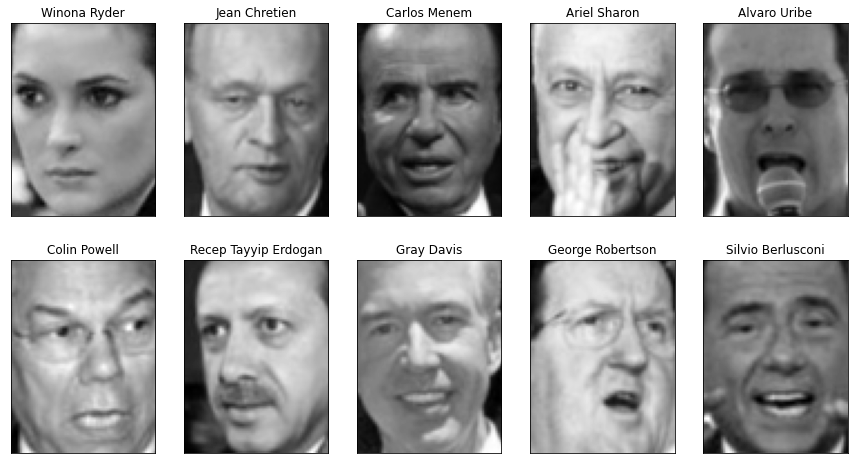

In [2]:
from sklearn.datasets import fetch_lfw_people 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import PIL

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) 
image_shape = people.images[0].shape

fig,axes = plt.subplots(2,5,figsize=(15, 8),subplot_kw={'xticks': () , 'yticks': ()})

for target,image,ax in zip(people.target,people.images,axes.ravel()): 
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])


In [3]:
print ("people . images . shape : {}". format ( people.images.shape )) 
print("Number of classes: {}".format(len(people.target_names)))

people . images . shape : (3023, 87, 65)
Number of classes: 62


In [4]:
# count how often each target appears 
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)): 
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print ()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [5]:
mask = np.zeros(people.target.shape, dtype=np.bool) 
for target in np.unique(people.target):
    mask[np.where(people.target == target )[0][:50]] = 1


X_people = people.data[mask]
y_people = people.target [mask]

# scale the grayscale values to be between 0 and 1 # instead of 0 and 255 for better numeric stability
X_people = X_people/255.

In [6]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)

XX_train = X_train

# build a KNeighborsClassifier using one neighbor 
knn = KNeighborsClassifier ( n_neighbors=1) 
knn.fit(X_train, y_train)
print("Test set score of 1−nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1−nn: 0.23


1. Write your own version of KNN (k=1) where you use the SSD (sum of squared differences) to compute similarity

In [7]:
def SSD(x1, x2):
    sum_of_squared_differences = np.sqrt(((x1-x2)**2).sum())
    return sum_of_squared_differences

In [8]:
def k1_kNN(testing_X, training_X, training_Y):
    predicted_Y = []
    for q in range(testing_X.shape[0]):

        k = 1

        distance = []
        for i in range(training_X.shape[0]):
            d = SSD(testing_X[q], training_X[i])
            distance.append(d)
        distance = np.array(distance)

        get_index = []
        for p in enumerate(distance):
            get_index.append(p)

        get_index.sort(key=lambda x:x[1])

        sorted_index = []
        for i in get_index:
            sorted_index.append(i[0])

        k1_close_trainY = training_Y[sorted_index][:k] 


        predicted_Y.append(k1_close_trainY)

    predicted_Y = np.array(predicted_Y)
    
    return predicted_Y


2. Verify that your KNN has a similar accuracy as sklearn’s version

In [9]:
Y_hat = k1_kNN(X_test, X_train, y_train)

In [10]:
y_test = np.reshape(y_test, (-1,1))
Y_test_Y_hat = np.hstack((y_test, Y_hat))

In [11]:

T=0
F=0

for a,b in Y_test_Y_hat:
    if a==b:
        T+=1
    else :
        F+=1
 

     
            
print("True: ", T)
print("False: ", F)


Accuracy = (T)/(T+F)


print("kNN Accuracy: ", Accuracy)
print("knn of sklearn: ",knn.score(X_test, y_test))


True:  120
False:  396
kNN Accuracy:  0.23255813953488372
knn of sklearn:  0.23255813953488372


3. Standardize your data (zero mean, divide by standard deviation)

In [12]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0, ddof=1)
X_train_stded = (X_train - mean)/std

In [13]:
cov = np.cov(X_train_stded.T)

In [14]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [15]:
eigenvectorsT = eigenvectors.T ###

index_eigenvalues = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[index_eigenvalues]
eigenvectors = eigenvectorsT[index_eigenvalues]

In [33]:
np.argsort(eigenvalues)[::-1]

array([   0,    1,    2, ..., 5652, 5653, 5654])

In [30]:
np.argsort(eigenvalues)

array([5654, 5653, 5652, ...,    2,    1,    0])

In [16]:
def PCA(dimentions):
    eigenvectors_dim = eigenvectors[:dimentions]
    eigenvectors_dim = eigenvectors_dim.T ###
    
    return eigenvectors_dim

4. Reduces the data to 100D using PCA

In [17]:
pca_train = X_train@(PCA(100))
pca_test = X_test@(PCA(100))

5. Compute the KNN again where K=1 with the 100D data. Report the accuracy

In [18]:
predicted_PCA_Y= k1_kNN(pca_test, pca_train, y_train)

In [19]:
y_test = np.reshape(y_test, (-1,1))

In [20]:
Y_test_Y_predicted = np.hstack((y_test, predicted_PCA_Y))

In [21]:
T=0
F=0

for a,b in Y_test_Y_predicted:
    if a==b:
        T+=1
    else :
        F+=1
 

     
            
print("True: ", T)
print("False: ", F)


Accuracy = (T)/(T+F)


print("Accuracy of the KNN again where K=1 with the 100D data: ", Accuracy)

True:  123
False:  393
Accuracy of the KNN again where K=1 with the 100D data:  0.23837209302325582


6. Compute the KNN again where K=1 with the 100D Whitened data. Report the accuracying

In [22]:
top_100_eigenval = eigenvalues[0:100]

Train_whiten = pca_train/np.sqrt(top_100_eigenval)
Test_whiten= pca_test/np.sqrt(top_100_eigenval)

In [23]:
predicted_PCA_Y = k1_kNN(Test_whiten, Train_whiten, y_train)

y_test = np.reshape(y_test, (-1,1))
Y_test_Y_predicted = np.hstack((y_test, predicted_PCA_Y))


T=0
F=0

for a,b in Y_test_Y_predicted:
    if a==b:
        T+=1
    else :
        F+=1
 

     
            
print("True: ", T)
print("False: ", F)


Accuracy = (T)/(T+F)


print("Accuracy of the KNN again where K=1 with the 100D Whitened data: ", Accuracy)


True:  152
False:  364
Accuracy of the KNN again where K=1 with the 100D Whitened data:  0.29457364341085274


7. Reduces the data to 2D using PCA

In [24]:
pca_train_2dim = XX_train@(PCA(2)) ######### 전체 데이터??? 트레인 데이터????

In [25]:
pca_all_2dim = X_people@(PCA(2))######### 전체 데이터

8. Graphs the data for visualization

/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


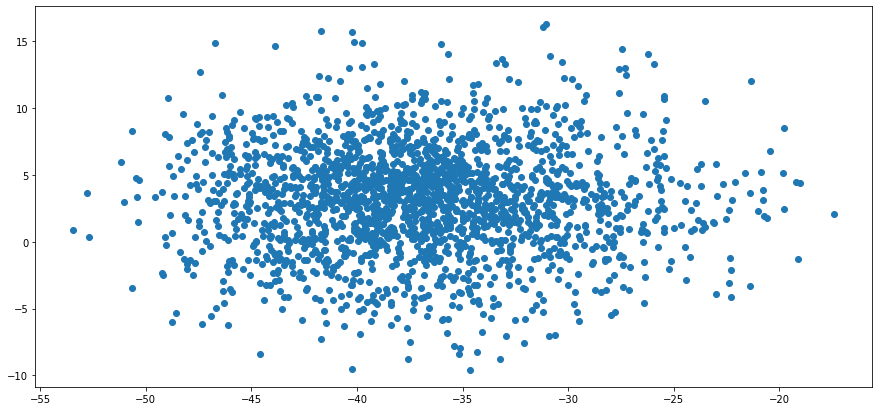

In [26]:

plt.rcParams["figure.figsize"] = (15,7)

plt.scatter(pca_all_2dim[:,0],pca_all_2dim[:,1])

# 3 Eigenfaces

4. Find the max and min image on PC1’s axis. Find the max and min of PC2. Plot and report the faces, what variation do these components capture?

The max and min images on PC1 captures the overall black and white tone. The max and min of PC2 show the contrast of shadows.

In [0]:
# getting index# of max and min
Max_pca1 = np.argmax(pca_train_2dim[:,0])
Min_pca1 = np.argmin(pca_train_2dim[:,0])
Max_pca2 = np.argmax(pca_train_2dim[:,1])
Min_pca2 = np.argmin(pca_train_2dim[:,1])

In [0]:
pca1_max_img = XX_train[Max_pca1]
pca1_min_img = XX_train[Min_pca1]
pca2_max_img = XX_train[Max_pca2]
pca2_min_img = XX_train[Min_pca2]

In [0]:
images = [pca1_max_img,pca1_min_img,pca2_max_img,pca2_min_img]
titles = ["pca1_max_img","pca1_min_img","pca2_max_img","pca2_min_img"]


In [0]:
def plot_gallery(images,titles,rows, cols):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape(87, 65), cmap=cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
        
        

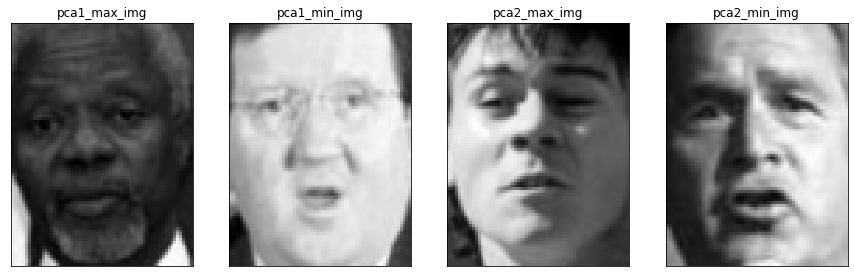

In [92]:
plot_gallery(images,titles, 1,4)

5. Visualizes the most important principle component as a 87x65 image (see Figure 2).

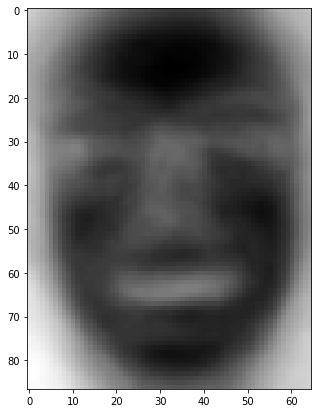

In [115]:
most_important_principle_component_img= PCA(1).reshape(87,65).real
plt.imshow(most_important_principle_component_img, cmap=cm.gray)

6. Reconstructs the X train[0,:] image using the primary principle component. To best see the full re-construction, “unstandardize” the reconstruction by multiplying it by the original standard deviation and adding back in the original mean.

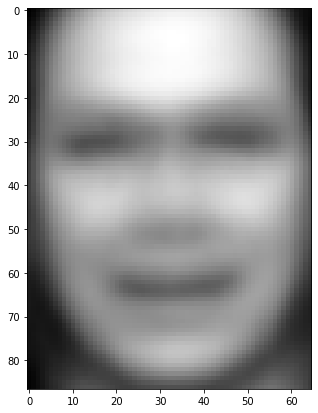

In [94]:
X_train_0_prj= X_train_stded[0]@PCA(1)
X_train_0_img= X_train_0_prj@PCA(1).T

#unstandalizing
X_train_0_img_unstd = (X_train_0_img*std)+mean

X_train_0_img_unstd_reshape = X_train_0_img_unstd.reshape(87,65).real
plt.imshow(X_train_0_img_unstd_reshape, cmap=cm.gray)

7. Determines the number of principle components necessary to encode at least 95% of the information, k.

In [96]:
k=0
sum_eigenval = 0
for i in eigenvalues:
    k += 1
    sum_eigenval += i
    if sum_eigenval/sum(eigenvalues) >= 0.95:
        print("K= ", k)
        break


K=  189


8. Reconstructs the X train[0,:] image using the k most significant eigen-vectors (found in the previous step, see Figure 4). For the fun of it maybe even look to see if you can perfectly reconstruct the face if you use all the eigen-vectors! Again, to best see the full re-construction, “unstandardize” the reconstruction by multiplying it by the original standard deviation and adding back in the original mean.

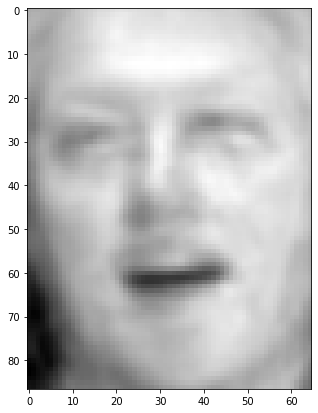

In [97]:
X_train_0_PCAk_prj = X_train_stded[0]@PCA(k)
X_train_0_PCAk_img = X_train_0_PCAk_prj@PCA(k).T

#unstandalizing
X_train_0_PCAk_img_unstd = (X_train_0_PCAk_img*std)+mean

X_train_0_PCAk_img_unstd_reshape = X_train_0_PCAk_img_unstd.reshape(87,65).real
plt.imshow(X_train_0_PCAk_img_unstd_reshape, cmap=cm.gray)

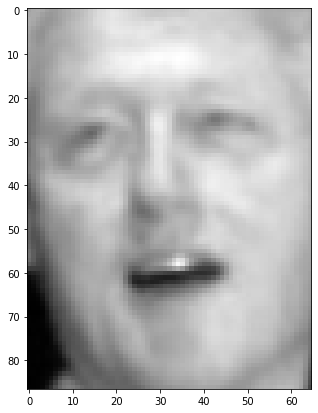

In [99]:
X_train_0_PCAk_prj = X_train_stded[0]@PCA(5655)
X_train_0_PCAk_img = X_train_0_PCAk_prj@PCA(5655).T

#unstandalizing
X_train_0_PCAk_img_unstd = (X_train_0_PCAk_img*std)+mean

X_train_0_PCAk_img_unstd_reshape = X_train_0_PCAk_img_unstd.reshape(87,65).real
plt.imshow(X_train_0_PCAk_img_unstd_reshape, cmap=cm.gray)

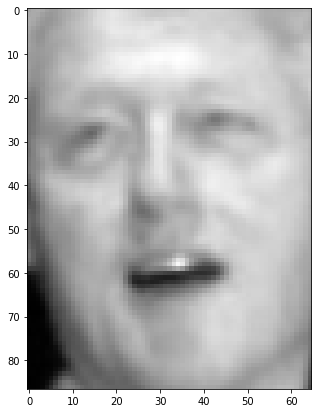

In [116]:
plt.imshow(XX_train[0].reshape(87,65).real, cmap=cm.gray)

# 4 Clustering

2. Standardize your data (zero mean, divide by standard deviation)

In [186]:
Allmean = np.mean(X_people, axis=0)
Allstd = np.std(X_people, axis=0, ddof=1)
X_people_stded = (X_people - Allmean)/Allstd

X_people_stded.shape


(2063, 5655)

3. Reduces the data to 100D using PCA.

In [0]:
X_people_stded_100D = X_people_stded @ PCA(100)

1. Write your own version of K-means clustering where you use the L2 distance to compute similarity

In [0]:
def L2(x1, x2):
    distance = np.sqrt(((x1-x2)**2).sum())
    return distance

In [0]:
def L1(x1, x2):
  distance = 0
  for i in range(len(x1)):
    distance += abs(x1[i] - x2[i])
  return distance


In [0]:
import math 

data = X_people_stded_100D

import random

np.random.seed(0)
np.random.shuffle(data)

k=10
iterations=10000

In [0]:
#getting random centroids
centroids = {}

for i in range(k):
    centroids[i] = data[i]


In [0]:
for i in range(iterations):
    clusters = {}

    for i in range(k):
        clusters[i] = []

    for pic in data:
        distances=[]
        for centroid in centroids:
            distance = L2(pic,centroids[centroid])
            distances.append(distance)



        min_distance = min(distances)
        cluster = distances.index(min_distance)
        clusters[cluster].append(pic)

    old_centroids = centroids

    for cluster in clusters:
        centroids[cluster] = np.mean(clusters[cluster],axis=0)

    Termination = True

    for c in range(k):
        old_centroid = old_centroids[c]
        current_centroid = centroids[c]

        if L1(old_centroid,current_centroid) > 10**(-23):            
            Termination = False

    if Termination == True:
        break
        
        

In [193]:
all = 0
for i in range(k):
    print("Number of cluster", i,": ", len(clusters[i]))
    all += len(clusters[i])
print("number of all clusters: ",all)

Number of cluster 0 :  110
Number of cluster 1 :  20
Number of cluster 2 :  286
Number of cluster 3 :  510
Number of cluster 4 :  132
Number of cluster 5 :  599
Number of cluster 6 :  45
Number of cluster 7 :  146
Number of cluster 8 :  163
Number of cluster 9 :  52
number of all clusters:  2063


In [0]:
centroids_k_images = []
for i in range(k):
    centroids_k_img = centroids[i]@PCA(100).T
    #unstandalizing
    centroids_k_img_instd = (centroids_k_img*Allstd)+Allmean

    centroids_k_img_instd_reshape = centroids_k_img_instd.reshape(87,65).real
    centroids_k_images.append(centroids_k_img_instd_reshape)

In [0]:
def pre_vis(image, dementions):

    image_prj_img = image@PCA(dementions).T
    #unstandalizing
    image_prj_img_unstd = (image_prj_img*Allstd)+Allmean

    image_prj_img_unstd= image_prj_img_unstd.real
    return image_prj_img_unstd

In [0]:
# finding max and min of each cluster

max_clusters = {}
min_clusters = {}

for i in range(k):
    max_clusters[i] = []
    min_clusters[i] = []


for i in range(k):
    distances=[]
    for j in clusters[i]:
        distance = L2(j,centroids[i])
        distances.append(distance)


    max_distance = max(distances)
    min_distance = min(distances)
    
    max_of_cluster = distances.index(max_distance)
    min_of_cluster = distances.index(min_distance)
    
    max_image = X_people_stded_100D[max_of_cluster]
    min_image = X_people_stded_100D[min_of_cluster]
    
    max_image = pre_vis(max_image,100)
    min_image = pre_vis(min_image,100)


    
    max_clusters[i].append(max_image)
    min_clusters[i].append(min_image)  



In [0]:
def plot_gallery(images, titles, rows, cols):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape(87, 65), cmap=cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
        
        
        

In [0]:
images = []
labels = []
for i in range(10):
    img1 = centroids_k_images[i]
    images.append(img1)
    labels.append("Center of cluster %s"%i)
    img2 = min_clusters[i][0]
    images.append(img2)
    labels.append("the min of %s cluster"%i)
    img3 = max_clusters[i][0]
    images.append(img3)
    labels.append("the max of %s cluster"%i)
    


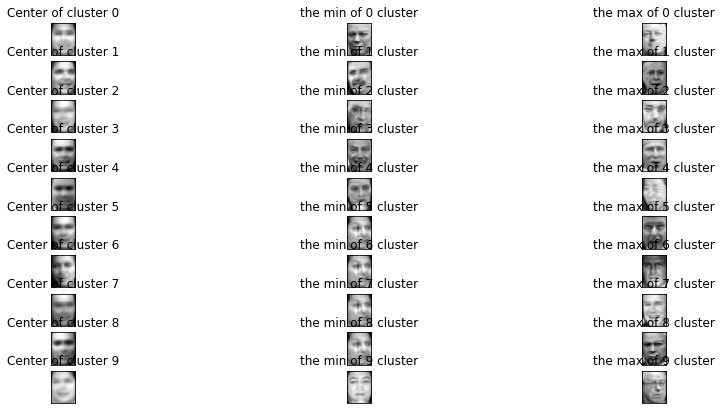

In [199]:
plot_gallery(images,labels,10 ,3)

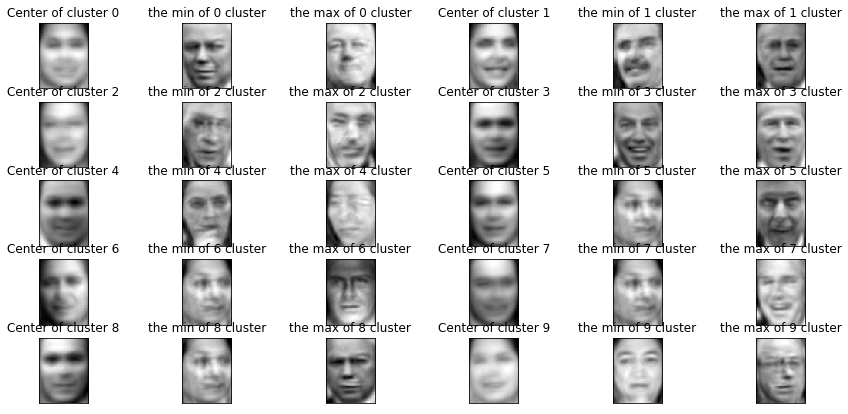

In [200]:
plot_gallery(images,labels,5 ,6)